# theoretical spectra

$$\begin{align}
C^{\kappa \kappa}_{\ell} & = [\ell(\ell+1)]^2\int^{\chi_*}_0 d\chi (\frac{\chi_*-\chi}{\chi^2\chi_*})^2P_\psi(\frac{\ell+0.5}{\chi},z(\chi)) \\
C^{qq}_{\ell} & = \int \frac{dz}{c}\frac{H(z)}{\chi^2(z)}f^2(z)P_{mm}(k=\frac{\ell}{\chi},z) \\
C^{\kappa q}_{\ell} & = \int \frac{dz}{c}\frac{H(z)}{\chi^2(z)}W(z)f(z)P_{mm}(k=\frac{\ell}{\chi},z)
\end{align}$$

$W(z), f(z)$ is the window function for CMB lensing and quasar distribution

$$\begin{align}
W(z) & = \frac{3H_0^2\Omega_{m,0}}{2cH(z)}(1+z)\chi(z)(1-\frac{\chi(z)}{\chi_*}) \\
f(z) & = \frac{b(z)dN/dz}{\int dz'\frac{dN}{dz'}} + \frac{3}{2H(z)}\Omega_0H_0^2(1+z)g(z)(5s-2)
\end{align}$$

we set $s=2/5$ so that the magnification bias term $\frac{3}{2H(z)}\Omega_0H_0^2(1+z)g(z)(5s-2)=0$

In [ ]:
from pipeline_mock import *

z_min = 2.2
z_max = 3.4
q_z = np.random.uniform(z_min,z_max,2*10**6)
s = 2/5

model = mock(q_z,z_min,z_max,s,z_reso=100,lmax=1200)

ell_kq, Ckq = model.Ckq(b=2.5,x=range(1200),line=True)
plt.plot(ell_kq, Ckq)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{\kappa q}$')
plt.show()

ell_kk, Ckk = model.Ckk(x=range(800),line=True)
Ckk[0] = 1E-20
plt.plot(ell_kk, Ckk)
plt.xlabel(r'\ell')
plt.ylabel(r'$C_\ell^{\kappa \kappa}$')
plt.show()

ell_qq, Cqq = model.Cqq(b=2.5,x=range(1200),line=True)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{qq}$')
plt.plot(ell_qq, Cqq)
plt.show()

# generate $\kappa$ and QSO maps

$$\begin{align}
a_{\ell m}^{\kappa\kappa} & = \xi_a (C_{\ell}^{\kappa\kappa})^{1/2} \\
a_{\ell m }^{qq} & = \xi_a C_{\ell}^{\kappa q}/(C_\ell^{\kappa\kappa})^{1/2} + \xi_b [C_\ell^{qq}-(C_{\ell}^{\kappa q})^2/C_\ell^{\kappa\kappa}]^{1/2}
\end{align}$$

$\xi$ : random amplitude with $\langle\xi\rangle=0$, $\langle\xi\xi^*\rangle=1$

so that :

$$\begin{align}
\langle a_{\ell m}^{\kappa\kappa} a_{\ell m}^{\kappa\kappa*} \rangle & = C_{\ell}^{\kappa\kappa} \\
\langle a_{\ell m}^{qq} a_{\ell m}^{qq*} \rangle & = C_{\ell}^{qq} \\
\langle a_{\ell m}^{\kappa\kappa} a_{\ell m}^{qq*} \rangle & = C_{\ell}^{\kappa q}
\end{align}$$

In [2]:
# generate mocks
alm_k,seed = hp.sphtfunc.synalm(Ckk)                    # seed -> xi_a
alm_q1,seed = hp.sphtfunc.synalm(Ckq**2/Ckk,seed=seed)  # seed -> xi_a
alm_q2,seed = hp.sphtfunc.synalm(Cqq-Ckq**2/Ckk)        # seed -> xi_b

alm_q = alm_q1 + alm_q2

map_k = hp.alm2map(alm_k,nside=2048)
map_q = hp.alm2map(alm_q,nside=2048)

# smooth masks
mask_q = hp.read_map('mask_q.fits')
mask_k = hp.read_map('mask_k.fits')

smooth_mask_q =  hp.sphtfunc.smoothing(mask_q,fwhm=np.deg2rad(10/60))
smooth_mask_k =  hp.sphtfunc.smoothing(mask_k,fwhm=np.deg2rad(10/60))
smooth_mask_kq = smooth_mask_q*smooth_mask_k

# measure Cls
fkq = np.sum(smooth_mask_kq)/len(smooth_mask_kq)      # sky fraction
re = 1/fkq*hp.sphtfunc.anafast(map_k*smooth_mask_kq,
                               map_q*smooth_mask_kq,lmax=1200)

/home/littlelin/anaconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


produce a seed
use selected seed
produce a seed
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/home/littlelin/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 4.246609 arcmin (0.001235 rad) 
-> fwhm is 10.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 4.246609 arcmin (0.001235 rad) 
-> fwhm is 10.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# Compare the re-constructed one and the modelled one

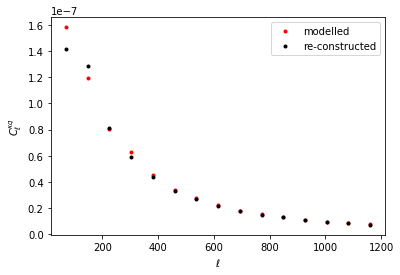

In [3]:
ell,cl = bin_corr(re)        # bin the power spectrum into 15 bins
ell_m,cl_m = bin_corr(Ckq)

plt.plot(ell_m,cl_m,'.',c='r',label='modelled')
plt.plot(ell,cl,'.',c='k',label='re-constructed')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{\kappa q}$')
plt.legend()
plt.show()